# Using Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Data Jobs.csv')


In [7]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## Plotting Job Posted dates

In [8]:
df.job_posted_date.head()

0   2023-06-16 13:44:15
1   2023-01-14 13:18:07
2   2023-10-10 13:14:55
3   2023-07-04 13:01:41
4   2023-08-07 14:29:36
Name: job_posted_date, dtype: datetime64[ns]

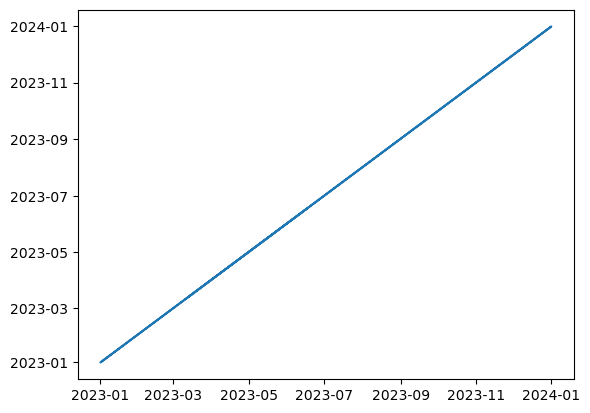

In [10]:
plt.plot(df.job_posted_date, df.job_posted_date)
plt.show()

In [22]:
date_counts = df.job_posted_date.value_counts()

date_counts = date_counts.sort_index()

In [24]:
date_counts

job_posted_date
2023-01-01 00:00:04    1
2023-01-01 00:00:07    1
2023-01-01 00:00:22    1
2023-01-01 00:00:24    1
2023-01-01 00:00:27    1
                      ..
2023-12-31 23:40:18    2
2023-12-31 23:40:22    2
2023-12-31 23:40:31    2
2023-12-31 23:40:32    1
2023-12-31 23:59:58    2
Name: count, Length: 607192, dtype: int64

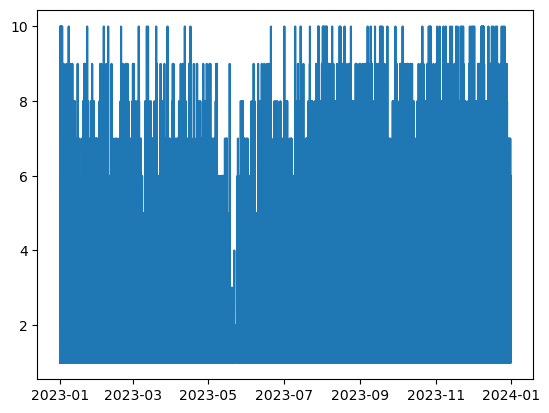

In [20]:
plt.plot(date_counts.index, date_counts)

In [26]:
df['job_posted_month'] = df['job_posted_date'].dt.month

In [30]:
monthly_counts = df.job_posted_month.value_counts()

monthly_counts = monthly_counts.sort_index()

monthly_counts


job_posted_month
1     91822
2     64578
3     64084
4     62919
5     52104
6     61572
7     63777
8     75162
9     62359
10    66611
11    64450
12    56303
Name: count, dtype: int64

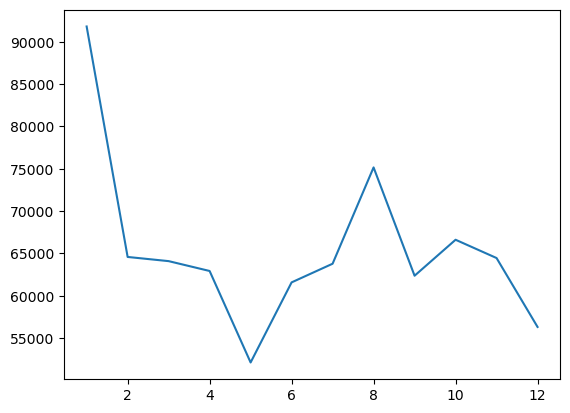

In [32]:
plt.plot(monthly_counts.index, monthly_counts)

## Bar Chart 

In [55]:
job_counts = df.job_title_short.value_counts()

In [59]:
# plt.bar(job_counts.index, job_counts) # We can use this for small graphs

### Matplotlib in a horizontal bar chart starts plotting from the bottom to upward

meaning the first item in your dataset appears at the bottom of the chart, and the last item appears at the top. 

This behavior is different from vertical bar charts (bar), where the first item appears on the left.

<BarContainer object of 10 artists>

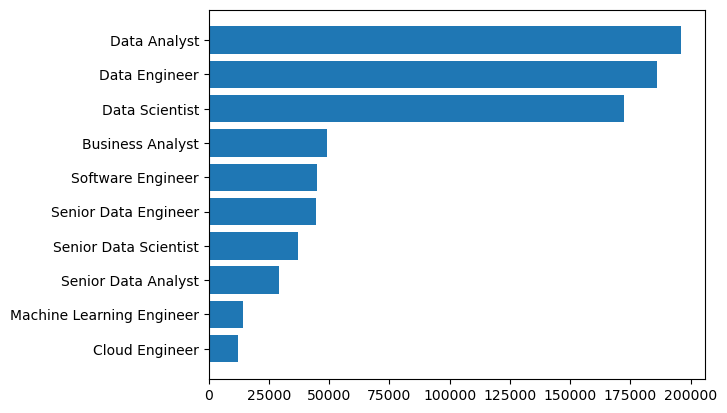

In [65]:
plt.barh(job_counts.index, job_counts)

**The following code will print teh job counts in ascending order**

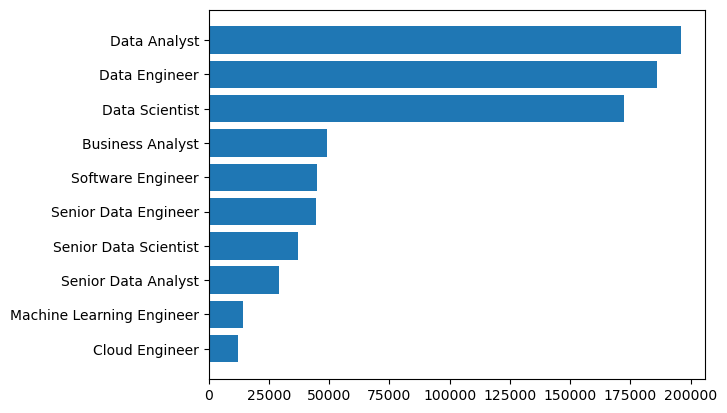

In [69]:
job_counts = job_counts.sort_values(ascending = True)
plt.barh(job_counts.index, job_counts)
plt.show() # this will hide teh extra text we get (eg. <BarContainer object of 10 artists>)

## Labelling 

Cleaning up the visualization

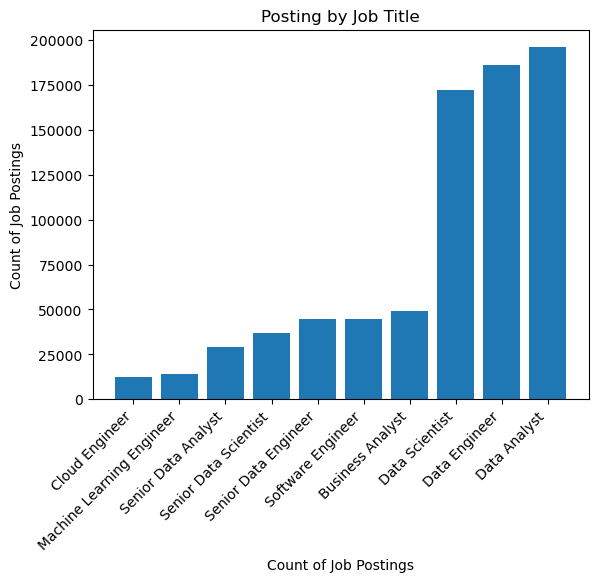

In [94]:
plt.bar(job_counts.index, job_counts)
plt.title('Posting by Job Title')
plt.ylabel('Count of Job Postings')
plt.xlabel('Count of Job Postings')
plt.xticks(rotation = 45, ha = "right") # Rotates teh labels in X-axis to 45°, ha = 'right' was given to properly align the labels.
plt.show()

# job_counts.plot(kind='bar')

creates a bar chart from a Pandas Series using Matplotlib in the background, 
allowing quick visualization of categorical data frequencies

<Axes: xlabel='job_title_short'>

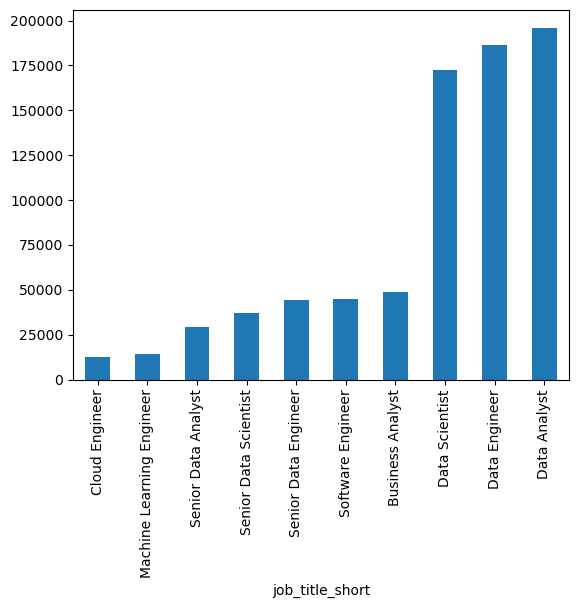

In [96]:
job_counts.plot(kind = 'bar') # We can use line to make it to line graph

In [16]:
df.groupby('job_title_short')['salary_year_avg'].median().sort_values()

job_title_short
Business Analyst              85000.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Software Engineer             99150.0
Machine Learning Engineer    106415.0
Senior Data Analyst          111175.0
Data Engineer                125000.0
Data Scientist               127500.0
Senior Data Engineer         147500.0
Senior Data Scientist        155500.0
Name: salary_year_avg, dtype: float64

In [18]:
job_salary = df.groupby('job_title_short')['salary_year_avg'].mean().sort_values()

Text(0, 0.5, ' ')

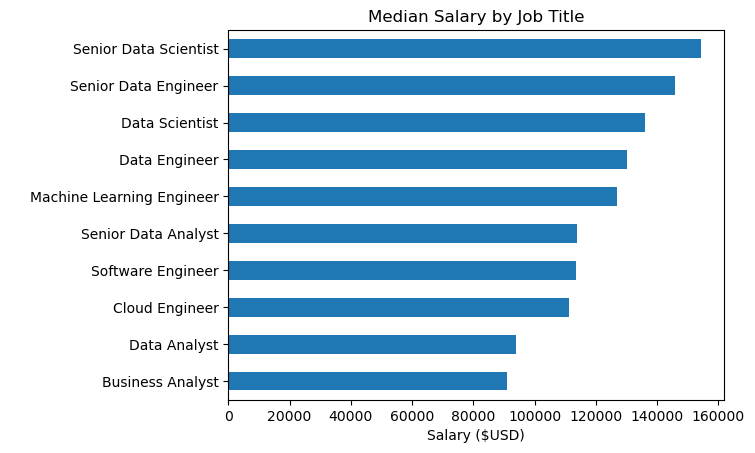

In [22]:
job_salary.plot(kind='barh')
plt.title('Median Salary by Job Title')
plt.xlabel('Salary ($USD)')
plt.ylabel(' ')
